In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
import missingno as msno
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("bestsellers.csv",parse_dates=["Year"])

In [3]:
df.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Name         550 non-null    object        
 1   Author       550 non-null    object        
 2   User Rating  550 non-null    float64       
 3   Reviews      550 non-null    int64         
 4   Price        550 non-null    int64         
 5   Year         550 non-null    datetime64[ns]
 6   Genre        550 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 30.2+ KB


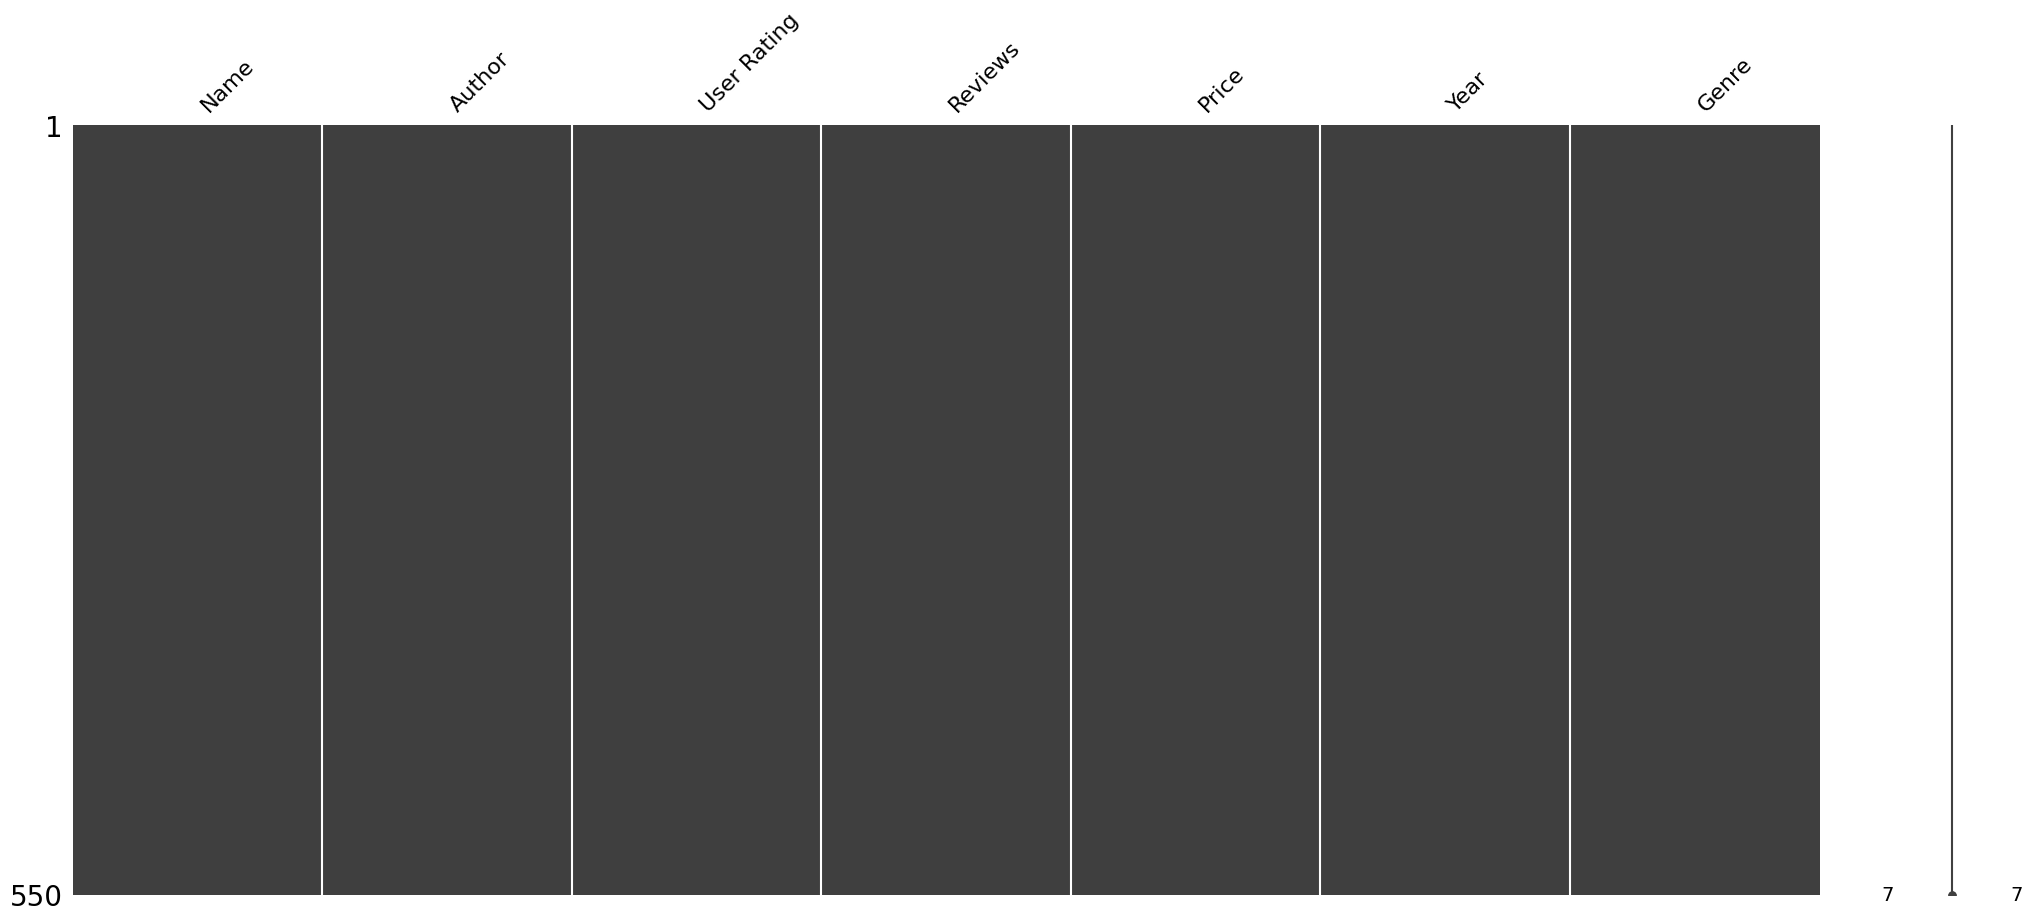

In [5]:
msno.matrix(df)
plt.show()

In [6]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550
mean,4.618364,11953.281818,13.100000,2013-12-31 21:49:05.454545408
min,3.300000,37.000000,0.000000,2009-01-01 00:00:00
25%,4.500000,4058.000000,7.000000,2011-01-01 00:00:00
50%,4.700000,8580.000000,11.000000,2014-01-01 00:00:00
75%,4.800000,17253.250000,16.000000,2017-01-01 00:00:00
max,4.900000,87841.000000,105.000000,2019-01-01 00:00:00
std,0.226980,11731.132017,10.842262,NaN


In [7]:
df.select_dtypes("object")

,Name,Author,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,Non Fiction
1,11/22/63: A Novel,Stephen King,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,Non Fiction
3,1984 (Signet Classics),George Orwell,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,Non Fiction
...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,Non Fiction


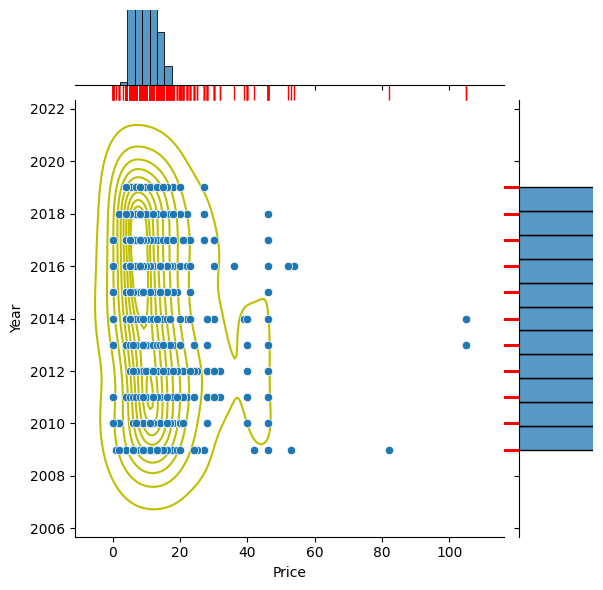

In [8]:
g = sns.jointplot(data=df,x="Price",y="Year")
g.plot_joint(sns.kdeplot,color='y',zorder=0)
g.plot_marginals(sns.rugplot,color='r',height=-0.2,clip_on=False)

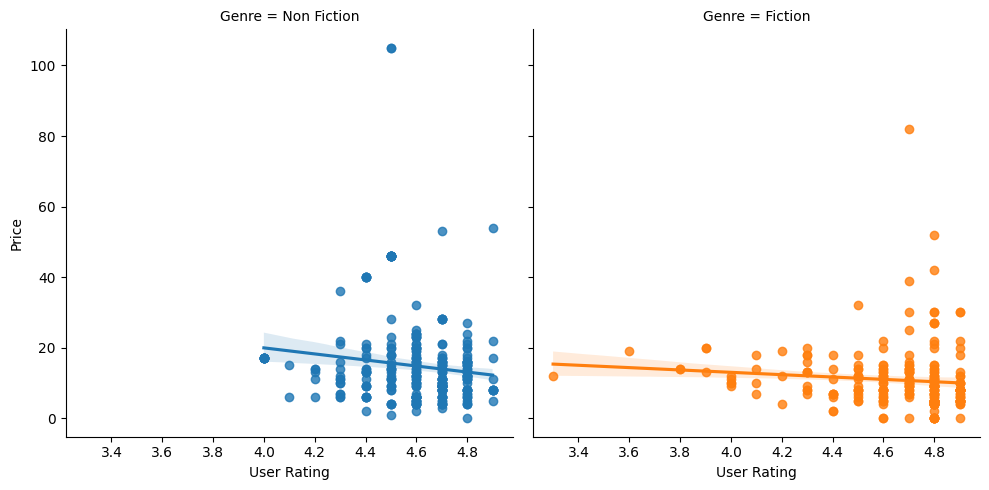

In [9]:
sns.lmplot(data=df,x="User Rating",y="Price",hue="Genre",col="Genre")

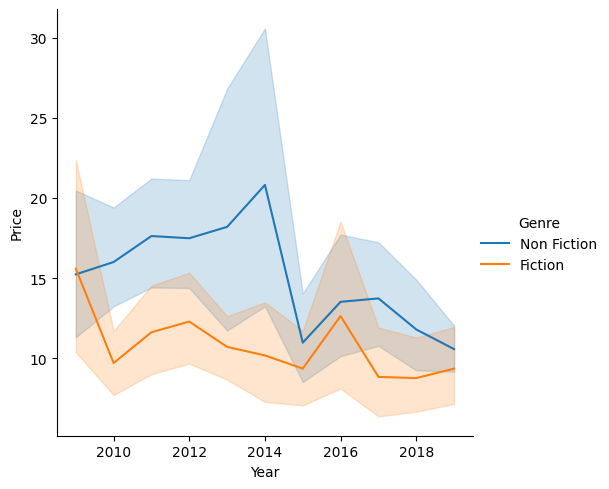

In [10]:
sns.relplot(data=df,x="Year",y="Price",hue="Genre",kind="line")

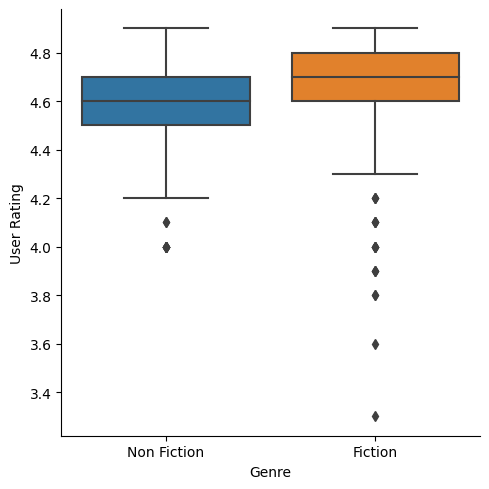

In [11]:
sns.catplot(data=df,x="Genre",y="User Rating",kind="box")

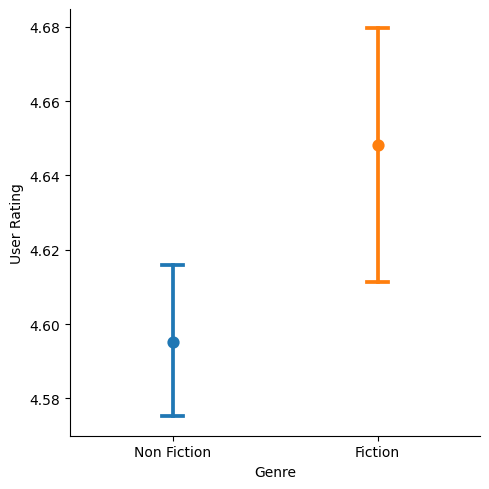

In [12]:
sns.catplot(data=df,x="Genre",y="User Rating",kind="point",capsize=0.1,hue="Genre")

In [13]:
df["mean_price_on_year"] = df.groupby("Year")['Price'].transform(lambda x : x.median())

In [14]:
df[["Year","mean_price_on_year"]].value_counts()

Year        mean_price_on_year
2009-01-01  12.0                  50
2010-01-01  12.5                  50
2011-01-01  13.0                  50
2012-01-01  13.0                  50
2013-01-01  12.5                  50
2014-01-01  10.0                  50
2015-01-01  9.0                   50
2016-01-01  9.0                   50
2017-01-01  9.0                   50
2018-01-01  8.0                   50
2019-01-01  10.0                  50
Name: count, dtype: int64

In [15]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,mean_price_on_year
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016-01-01,Non Fiction,9.0
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011-01-01,Fiction,13.0
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018-01-01,Non Fiction,8.0
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017-01-01,Fiction,9.0
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019-01-01,Non Fiction,10.0


In [16]:
df["mean_rating_by_genre"] = df.groupby("Genre")["User Rating"].transform(lambda x : x.median())

In [17]:
df[["Genre","mean_rating_by_genre"]].value_counts()

Genre        mean_rating_by_genre
Non Fiction  4.6                     310
Fiction      4.7                     240
Name: count, dtype: int64

In [18]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,mean_price_on_year,mean_rating_by_genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016-01-01,Non Fiction,9.0,4.6
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011-01-01,Fiction,13.0,4.7
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018-01-01,Non Fiction,8.0,4.6
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017-01-01,Fiction,9.0,4.7
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019-01-01,Non Fiction,10.0,4.6


In [19]:
df['Author'].value_counts()

Author
Jeff Kinney                           12
Gary Chapman                          11
Rick Riordan                          11
Suzanne Collins                       11
American Psychological Association    10
                                      ..
Keith Richards                         1
Chris Cleave                           1
Alice Schertle                         1
Celeste Ng                             1
Adam Gasiewski                         1
Name: count, Length: 248, dtype: int64

In [20]:
df.describe()

,User Rating,Reviews,Price,Year,mean_price_on_year,mean_rating_by_genre
count,550.000000,550.000000,550.000000,550,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2013-12-31 21:49:05.454545408,10.727273,4.643636
min,3.300000,37.000000,0.000000,2009-01-01 00:00:00,8.000000,4.600000
25%,4.500000,4058.000000,7.000000,2011-01-01 00:00:00,9.000000,4.600000
50%,4.700000,8580.000000,11.000000,2014-01-01 00:00:00,10.000000,4.600000
75%,4.800000,17253.250000,16.000000,2017-01-01 00:00:00,12.500000,4.700000
max,4.900000,87841.000000,105.000000,2019-01-01 00:00:00,13.000000,4.700000
std,0.226980,11731.132017,10.842262,NaN,1.802695,0.049639


In [21]:
df.memory_usage(deep=True)

Index                     128
Name                    59737
Author                  39078
User Rating              4400
Reviews                  4400
Price                    4400
Year                     4400
Genre                   36440
mean_price_on_year       4400
mean_rating_by_genre     4400
dtype: int64

## outliers and cleaning data 

In [22]:
#identifying the outliers

sevety_fifth = df['Price'].quantile(0.75)
twenty_fifth = df['Price'].quantile(0.25)

iqr = sevety_fifth - twenty_fifth

upper = sevety_fifth + (1.5*iqr)
lower = twenty_fifth - (1.5*iqr)

print(upper,lower)

29.5 -6.5


In [23]:
df[(df['Price']< lower) | (df['Price'] > upper)]

,Name,Author,User Rating,Reviews,Price,Year,Genre,mean_price_on_year,mean_rating_by_genre
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014-01-01,Fiction,10.0,4.7
12,A Stolen Life: A Memoir,Jaycee Dugard,4.6,4149,32,2011-01-01,Non Fiction,13.0,4.6
69,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2013-01-01,Non Fiction,12.5,4.6
70,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2014-01-01,Non Fiction,10.0,4.6
108,Fifty Shades Trilogy (Fifty Shades of Grey / F...,E L James,4.5,13964,32,2012-01-01,Fiction,13.0,4.7
151,Hamilton: The Revolution,Lin-Manuel Miranda,4.9,5867,54,2016-01-01,Non Fiction,9.0,4.6
153,Harry Potter and the Chamber of Secrets: The I...,J.K. Rowling,4.9,19622,30,2016-01-01,Fiction,9.0,4.7
156,Harry Potter and the Prisoner of Azkaban: The ...,J.K. Rowling,4.9,3146,30,2017-01-01,Fiction,9.0,4.7
159,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,4.8,13471,52,2016-01-01,Fiction,9.0,4.7
271,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2009-01-01,Non Fiction,12.0,4.6


In [24]:
no_outlier = df[(df['Price'] > lower) & (df['Price'] < upper)]

In [25]:
no_outlier.describe()

,User Rating,Reviews,Price,Year,mean_price_on_year,mean_rating_by_genre
count,519.000000,519.000000,519.000000,519,519.000000,519.000000
mean,4.620424,12158.373796,11.104046,2014-01-22 00:33:17.687861248,10.704239,4.644316
min,3.300000,37.000000,0.000000,2009-01-01 00:00:00,8.000000,4.600000
25%,4.500000,4247.000000,7.000000,2011-01-01 00:00:00,9.000000,4.600000
50%,4.700000,8491.000000,10.000000,2014-01-01 00:00:00,10.000000,4.600000
75%,4.800000,17336.500000,15.000000,2017-01-01 00:00:00,12.500000,4.700000
max,4.900000,87841.000000,28.000000,2019-01-01 00:00:00,13.000000,4.700000
std,0.229838,11910.557758,5.802140,NaN,1.804301,0.049724


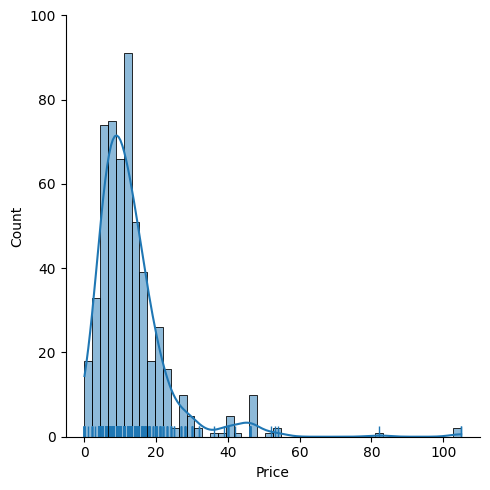

In [26]:
sns.displot(data =df,x='Price',kde=True,rug=True)

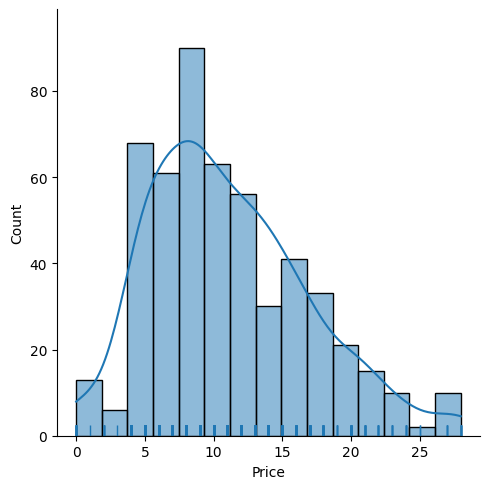

In [27]:
sns.displot(data =no_outlier,x='Price',kde=True,rug=True)

## Patterns over time

In [28]:
df.dtypes

Name                            object
Author                          object
User Rating                    float64
Reviews                          int64
Price                            int64
Year                    datetime64[ns]
Genre                           object
mean_price_on_year             float64
mean_rating_by_genre           float64
dtype: object

<Axes: xlabel='Year', ylabel='Price'>

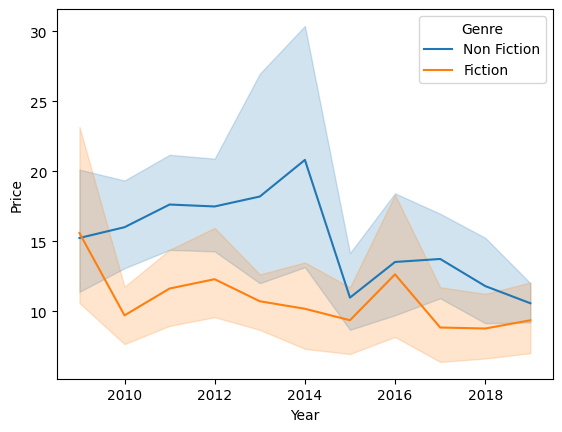

In [29]:
sns.lineplot(data=df,x="Year",y="Price",hue="Genre")

## Correlation

In [30]:
df.corr()

ValueError: could not convert string to float: '10-Day Green Smoothie Cleanse'

In [ ]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
sns.pairplot(data=no_outlier,vars=["Price","Year","User Rating"])
plt.show()

## KDE

In [ ]:
sns.kdeplot(data=df,x="User Rating",hue="Genre",cut=0,cumulative=True)
plt.show()

In [ ]:
from thefuzz import fuzz

In [ ]:
#compare reeding vs reading

fuzz.WRatio('Reeding','Reading')

In [ ]:
df.head()

In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
import recordlinkage

In [ ]:
bf = pd.read_csv("books.csv")
bf.head()

Comapring and importing author from the two data frames

In [ ]:
indexer = recordlinkage.Index()

In [ ]:
df.head()

In [ ]:
bf.rename(columns={'authors':'author'},inplace=True)

In [ ]:
indexer.block('author')
pairs = indexer.index(df,bf)

In [ ]:
print(pairs)

In [ ]:
#create compare object
compare_col = recordlinkage.Compare()

In [ ]:
#find the exact matches for pairs of colums here only 'author'ArithmeticError

compare_col.exact('author','author',label = 'new_author')

In [ ]:
#find simialr matches for pairs of names using string similarity

compare_col.string('author','author',threshold = 0.85,label='new_author')

In [ ]:
#find the matches
potential_matches = compare_col.compute(pairs,df,bf)

In [ ]:
print(potential_matches)

In [ ]:
matches =  potential_matches[potential_matches.sum(axis=1) >= 2]

In [ ]:
matches.index

In [ ]:
#get indicies from only column bf
duplicate_rows = matches.index.get_level_values(1)
print(duplicate_rows)

In [ ]:
#finding duplicates in bf

bf_dupicates = bf[bf.index.isin(duplicate_rows)]

In [ ]:
#finding not duplicates 

bf_new = bf[~bf.index.isin(duplicate_rows)]

In [ ]:
#link the dataframe

full_book = df.append(bf_new)
full_book.head()